<h1 style="background-color:black
;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 100px 100px; color:#40E0D0"> Heart Failure Predictions </h1><a id=0></a>

In [49]:
!pip install jovian opendatasets --upgrade --quiet

!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

!pip install plotly --upgrade 


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --quite


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [51]:
df = pd.read_csv("../input/heart-failure-prediction/heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [52]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [54]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [55]:
missing_values = df.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_dark',
       title = 'Missing Values')
fig.show()

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Find Outliers </h1><a id=0></a>

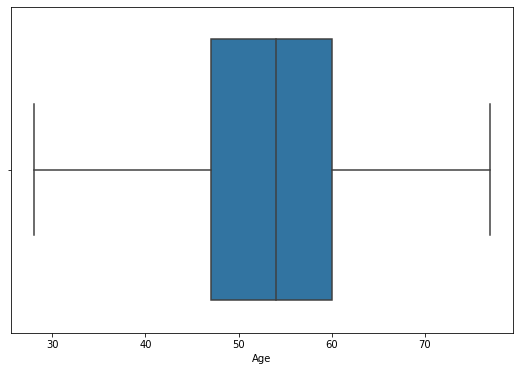

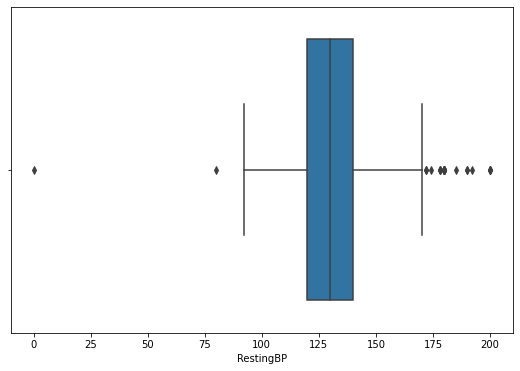

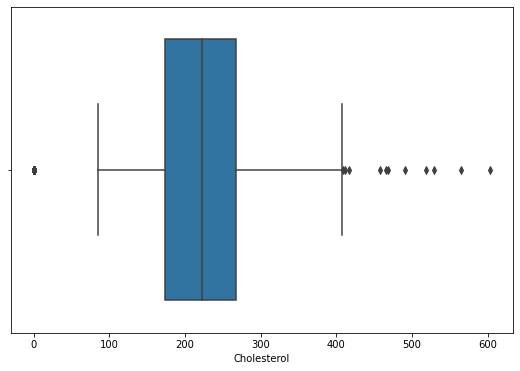

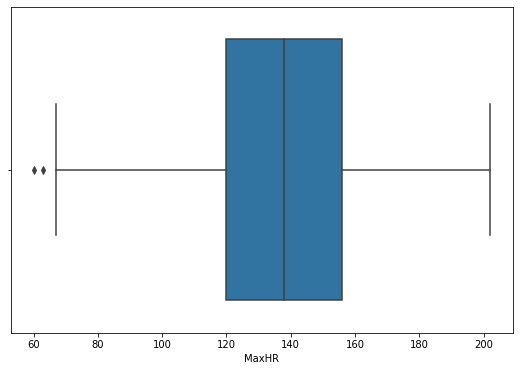

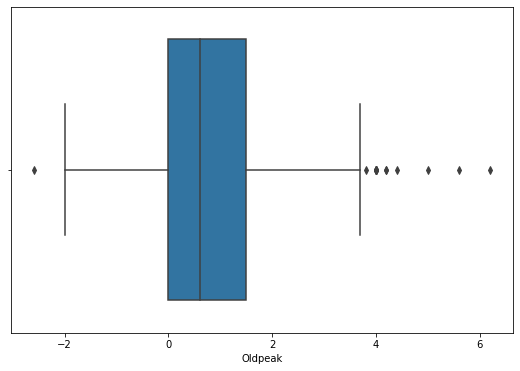

In [56]:
col2=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for c in col2:
    fig=plt.figure(figsize=(9,6))
    sns.boxplot(x=df[c],hue=df.HeartDisease)

#plt.figure(figsize=(20,10))
#sns.boxplot(y=df.FastingBs);
#plt.ylabel('FastingBs', fontsize=20, labelpad=20);

**Insight**

We have some Outliers in Oldpeak,MaxHR, RestingBP and Cholesterol.Let's remove these Outliers.


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Remove Outliers Using IQR </h1><a id=0></a>
IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle.An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.

**Steps:**

1.Arrange the data in increasing order

2.Calculate first(q1) and third quartile(q3)

3.Find interquartile range (q3-q1)

4.Find lower bound q1*1.5

5.Find upper bound q3*1.5

**Anything that lies outside of lower and upper bound is an outlier**


In [57]:
#Arrange the data in increasing order
sorted(col2)

['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']

In [58]:
import numpy as np
q1, q3= np.percentile(df['RestingBP'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 90.0
upper_bound 170.0


In [59]:
df = df[(df['RestingBP']>=90) & (df['RestingBP']<=170)]


Same we will Remove  Outliers from Oldpeak,MaxHR  and Cholesterol.Let's remove these Outliers.

In [60]:
q1, q3= np.percentile(df['Oldpeak'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound -2.25
upper_bound 3.75


In [61]:
df = df[(df['Oldpeak']>=-2) & (df['Oldpeak']<=3)]


In [62]:
q1, q3= np.percentile(df['MaxHR'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 66.0
upper_bound 210.0


In [63]:
df = df[(df['MaxHR']>=66) & (df['MaxHR']<=210)]

In [64]:
q1, q3= np.percentile(df['Cholesterol'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 38.125
upper_bound 401.125


In [65]:
df = df[(df['Cholesterol']>=38) & (df['Cholesterol']<=401)]

In [66]:
Sex = df.Sex.value_counts()

fig = px.pie(Sex, 
             values = Sex.values, 
             names = Sex.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">Removing abbreviations for chest pain type </h1><a id=0></a>

In [67]:
df.ChestPainType = df.ChestPainType.replace({'ASY': 'Asymptomatic',
                                             'ATA': 'Atypical angina',
                                             'NAP': 'Non-Anginal Pain',
                                              'TA': 'Typical Angina'})


In [68]:
ChestPainType = df.ChestPainType.value_counts()

fig = px.pie(ChestPainType, 
             values = ChestPainType.values, 
             names = ChestPainType.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [69]:
ExerciseAngina = df.ExerciseAngina.value_counts()

fig = px.pie(ExerciseAngina, 
             values = ExerciseAngina.values, 
             names = ExerciseAngina.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


In [70]:
RestingECG = df.RestingECG.value_counts()

fig = px.pie(RestingECG, 
             values = RestingECG.values, 
             names = RestingECG.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Bivariate Analysis (Comparing with target column)</h1><a id=0></a>

In [71]:
fig=plt.figure(figsize=(11,6))
px.histogram(x=df.Sex,color=df.HeartDisease,barmode='group')

<Figure size 792x432 with 0 Axes>

In [72]:
fig=plt.figure(figsize=(11,6))
px.histogram(x=df.ChestPainType,color=df.HeartDisease,barmode='group')

<Figure size 792x432 with 0 Axes>

In [73]:
fig=plt.figure(figsize=(11,6))
px.histogram(x=df.ExerciseAngina,color=df.HeartDisease,barmode='group')


<Figure size 792x432 with 0 Axes>

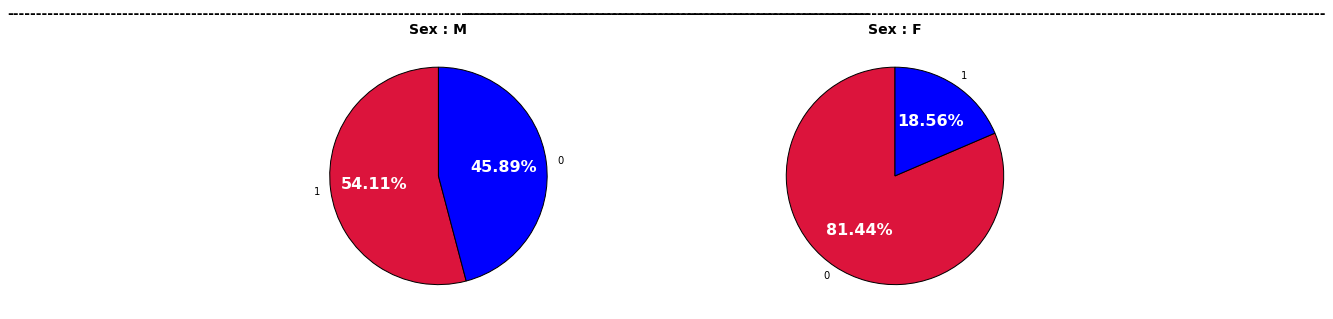

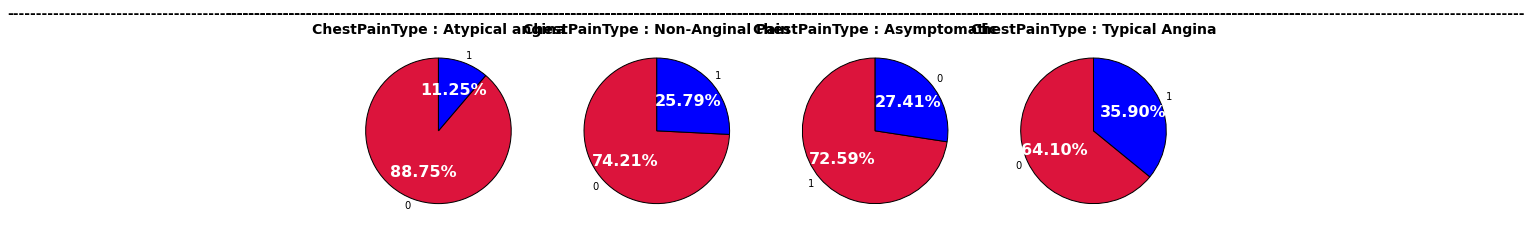

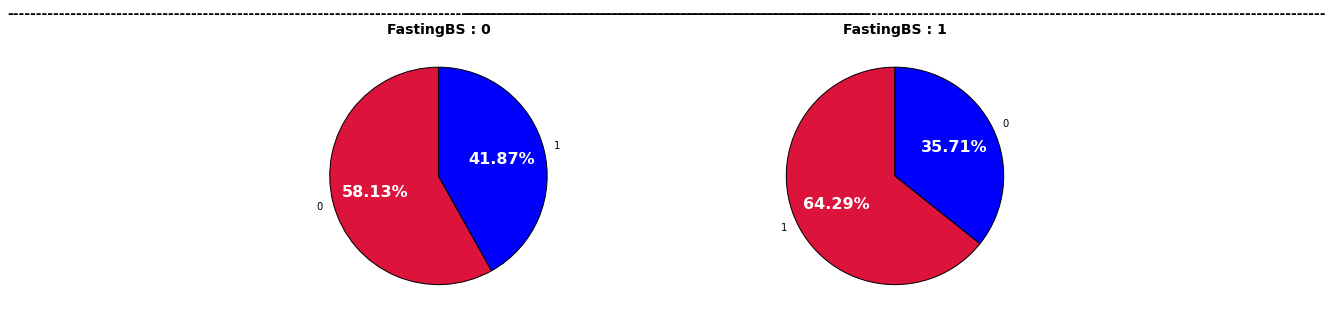

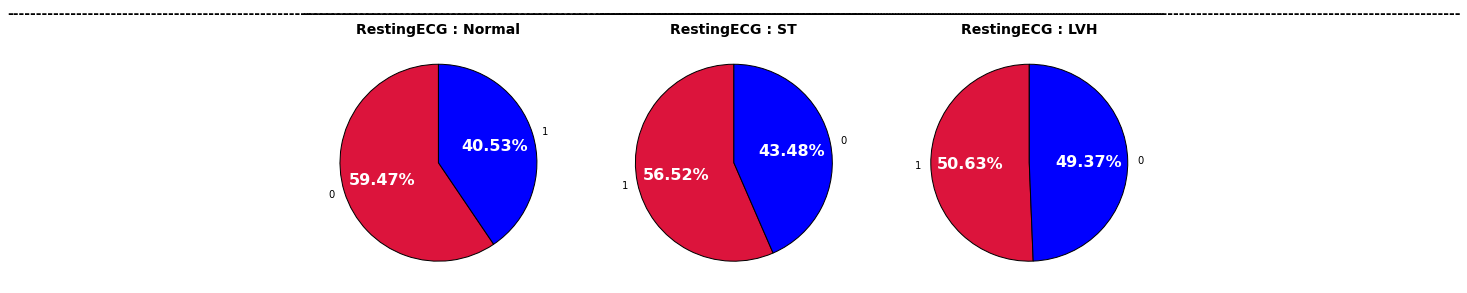

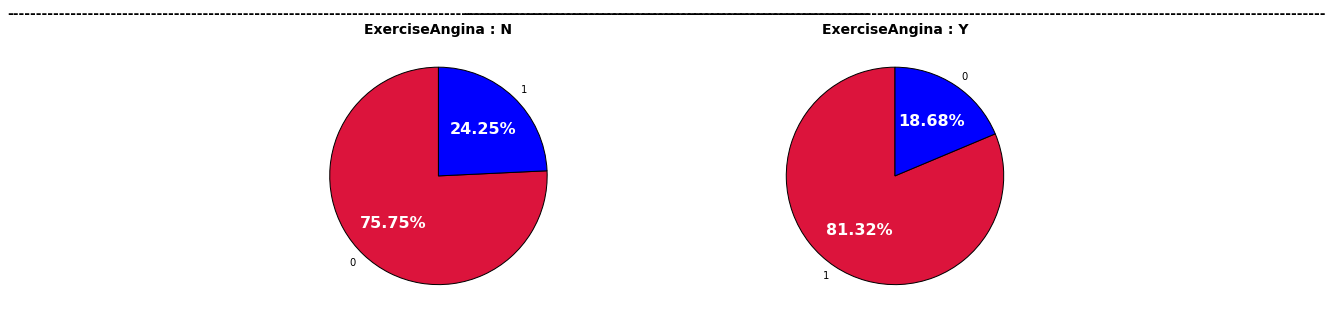

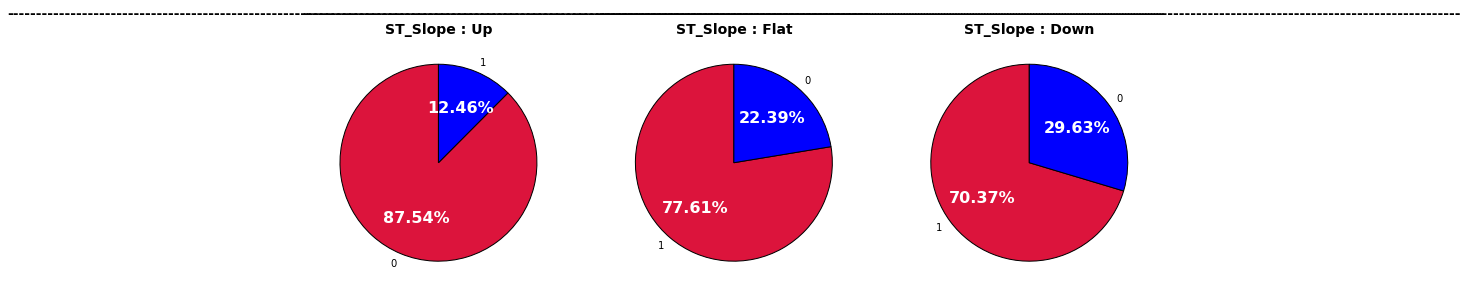

In [74]:
for c in df.columns:
    if (c != 'HeartDisease' and df[c].nunique()<10):
        fig, ax = plt.subplots(ncols=df[c].nunique(), figsize=(15,5))
        p = 0
        for i in df[c].unique():
            ax[p].set_title('-'*150+'\n'+str(c) +' : '+ str(i), size=14, fontweight='heavy')
            patches, texts, pcts = ax[p].pie(df[df[c]==i]['HeartDisease'].value_counts().values,
                   labels=df[df[c]==i]['HeartDisease'].value_counts().index,
                     autopct="%1.2f%%", startangle=90, colors=['crimson', 'blue'],
                     wedgeprops={"edgecolor":"black"})
            plt.setp(pcts, **{'color':'white','weight':'heavy','size':16})
            p += 1 
        fig.show()

**Insight**:

* Heart Disease is major problem for male as 54% male affected by it, whereas only 18% female affected by heart disease.
* For a  person having Asymptomatic (ASY) chest pain and /or FastingBS is 1  ( 72% and 64% respectively)  heart diseasee.
* For RestingECG is ST there's 56% chances of heart disease.
* Person having ExserciseAngina as Y has very high risk (81%) of heart disease.
* For ST_Slpoe of Flat and Down have high risk (i.e. 78% and 70% respectively) of heart disease whereas for ST_Slope of Up affection risk is low (12%)

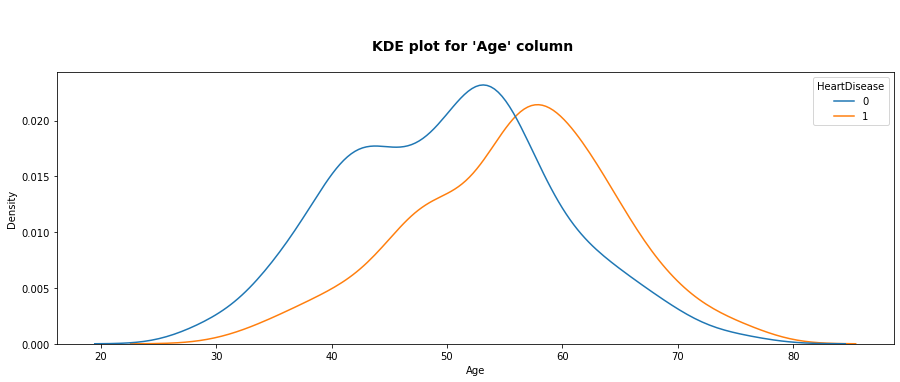

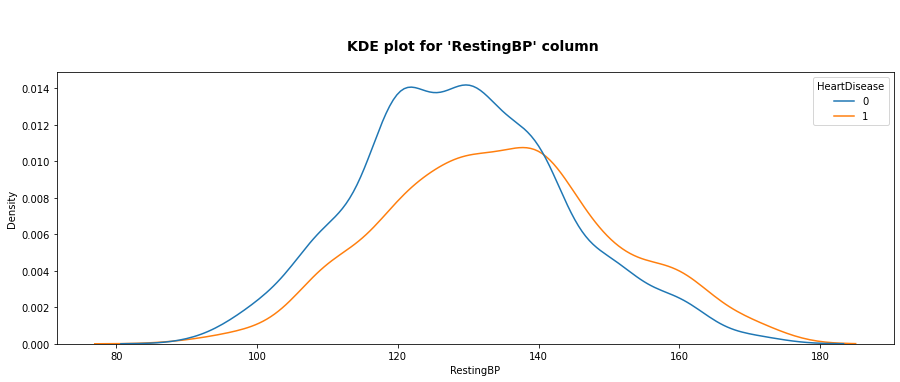

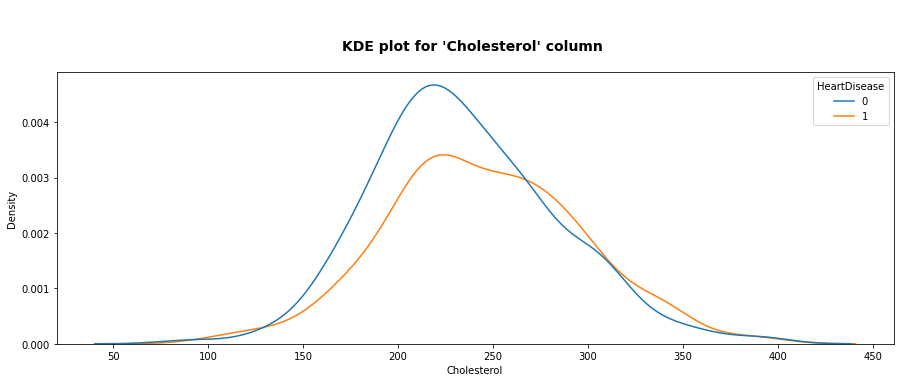

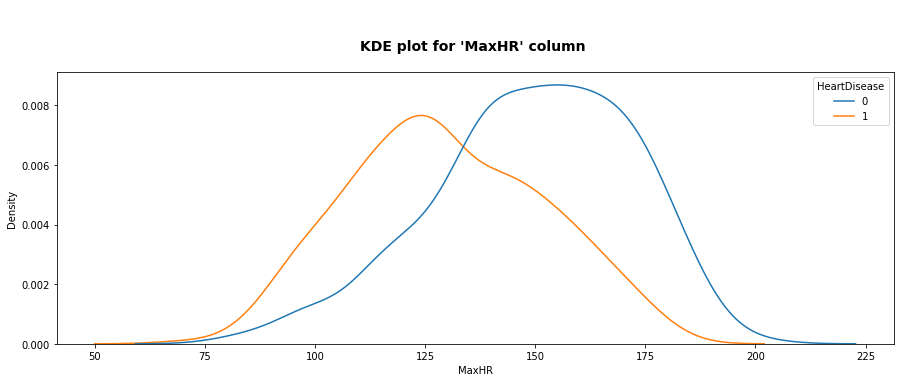

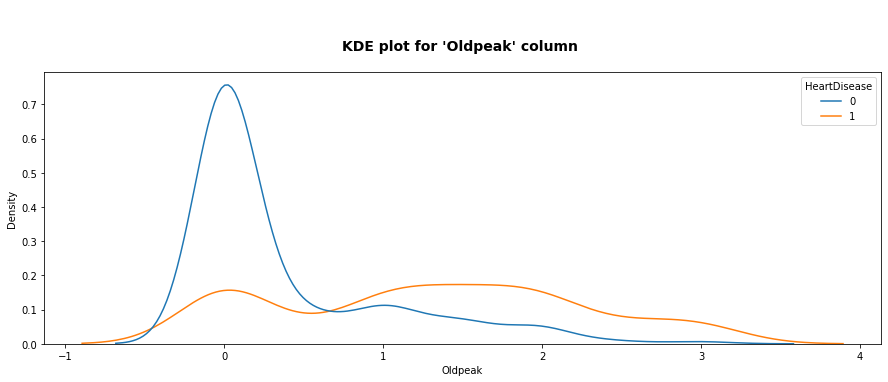

In [75]:
#sns.distplot(df.loc[df['HeartDisease']==1][c],kde_kws={'label':'Normal'},color='red')
col1=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for c in col1:
    plt.figure(figsize=(15,5))
    sns.kdeplot(df[c],hue = df['HeartDisease'])
    plt.title(f"\n\nKDE plot for '{c}' column \n", size=14, fontweight='bold')
    plt.show()

**Insight**

* As age increases risk of heart disease also increases and for age range of 55-65.
* Higher value of MaxHR shows sign of healthy heart.
* With increse in Oldpeak risk of heart disease also increses.
* Cholesterol having value near 200 is good for heart otherwise low and high cholesterol can cause heart disease.

In [76]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [77]:
#encode the categorical variables
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["ChestPainType"] = encoder.fit_transform(df["ChestPainType"])
df["RestingECG"] = encoder.fit_transform(df["RestingECG"])
df["ST_Slope"] = encoder.fit_transform(df["ST_Slope"])
df["ExerciseAngina"] = encoder.fit_transform(df["ExerciseAngina"])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Splitting Up the data set into traning and testing data </h1><a id=0></a>

In [78]:
X=df.drop('HeartDisease',axis=True)
y=df['HeartDisease']

In [79]:
#use gradientboosting to obtain prediction
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, gb_preds)
print("Accuracy of GradientBoostingClassifier: ",accuracy)

Accuracy of GradientBoostingClassifier:  0.8959537572254336
